In [1]:
import numpy as np
import numpy.random as npr
import scipy.special as scs
import seaborn as sns
import math
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
print(np.log1p(1e-99))
print(np.log(1 + 1e-99))

1e-99
0.0


In [3]:
print(np.expm1(1e-20))
print(np.exp(1e-20) - 1)

1e-20
0.0


In [6]:
print(np.isclose(1.1, 1.10009))
print(np.isfinite(2))
print(np.isinf(2))
print(np.isnan(2))

False
True
False
False


In [7]:
# Write a program to increment x = 0.0 by 0.1 1000 times. Compute x - 100. How do you interpret the result?
x = 0.0
for i in range(1000):
  x = x + 0.1

print(x)

99.9999999999986


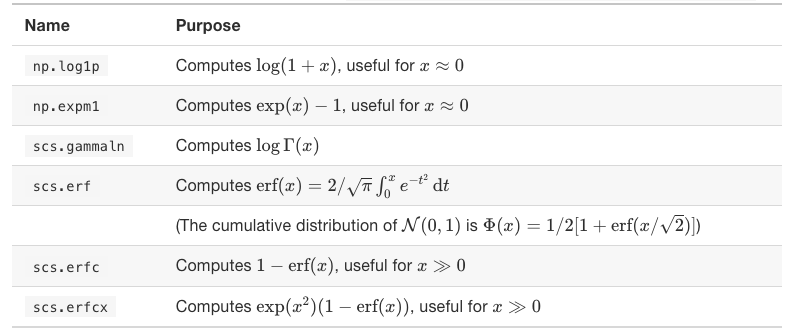

## **Box muller transformation**
for $x_1, x_2 \sim N(0,1)$

$p(x_1, x_2) = p(x_1) p(x_2) = \frac{1}{2 \pi} \exp{- \frac{x_1^2 + x_2^2}{2}}$

$(x1, x2) -> (r^2, \theta)$
$(x1, x2) = (\sqrt{r^2} cos \theta, \sqrt{r^2} sin \theta )$

$(y_1, y_2) = (\sqrt{-2 \log {x1}} \cos {2 \pi x2}, \sqrt{-2 \log {x1}} \sin {2 \pi x2})$





In [8]:
N = 100000
s = []
n = []
for i in range(N):
  x1 = np.random.uniform(0,1)
  x2 = np.random.uniform(0,1)
  s.append([x1, x2])
  y1 = np.sqrt(-2 * np.log(x1))* np.cos(2*math.pi*x2)
  y2 = np.sqrt(-2 * np.log(x1))* np.sin(2*math.pi*x2)
  n.append([y1, y2])


uniform = np.array(s)
normal =  np.array(n)


df_uniform = pd.DataFrame(data = uniform, columns = ["x", "y"])
df_normal = pd.DataFrame(data = normal, columns = ["x", "y"])


Text(0.5, 1.0, 'Normal')

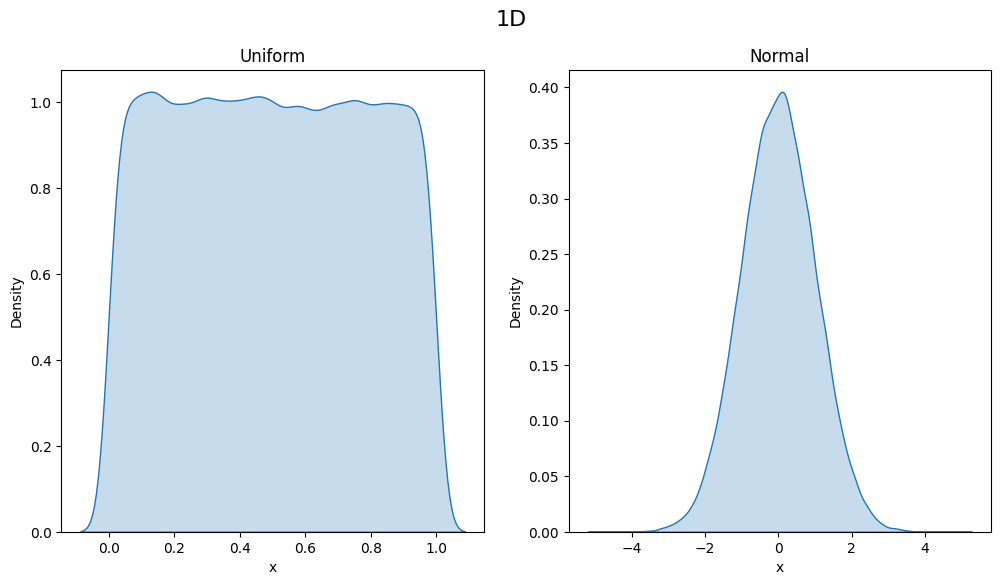

In [9]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
fig.suptitle("1D", fontsize=16)
sns.kdeplot (data=df_uniform, x="x", fill=True, ax=axs[0]).set_title('Uniform')
sns.kdeplot (data=df_normal, x="x", fill=True, ax=axs[1]).set_title('Normal')

Text(0.5, 1.0, 'Normal')

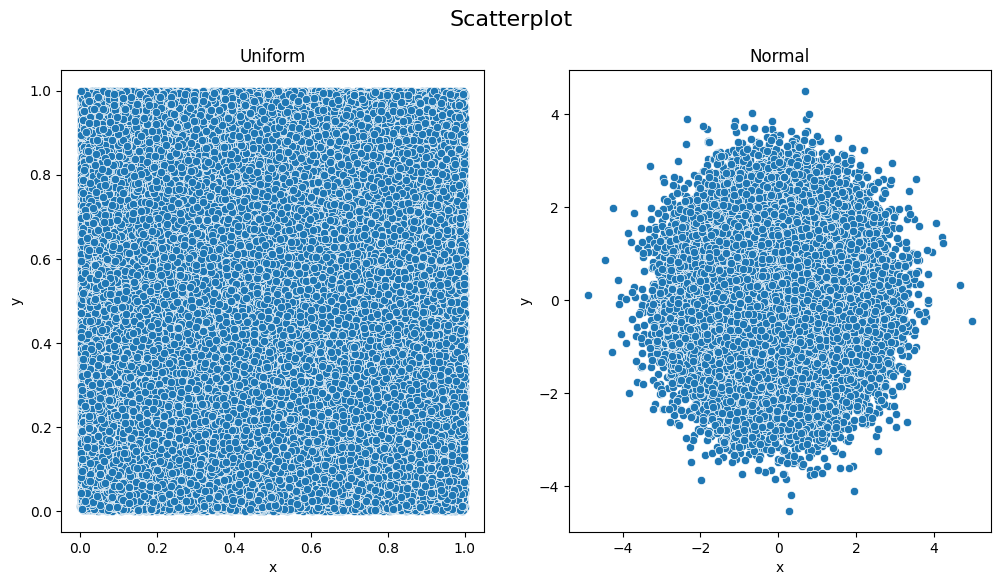

In [10]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
fig.suptitle("Scatterplot", fontsize=16)
sns.scatterplot (data=df_uniform, x="x", y="y", ax=axs[0]).set_title('Uniform')
sns.scatterplot (data=df_normal, x="x", y="y", ax=axs[1]).set_title('Normal')

Text(0.5, 1.0, 'Normal')

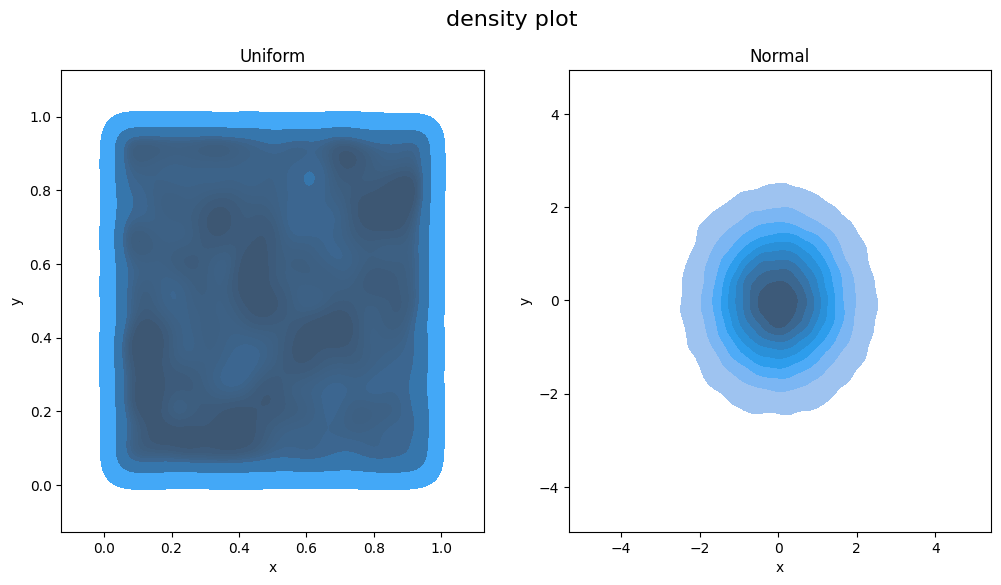

In [11]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
fig.suptitle("density plot", fontsize=16)
sns.kdeplot (data=df_uniform, x="x", y="y", fill=True, ax=axs[0]).set_title('Uniform')
sns.kdeplot (data=df_normal, x="x", y="y", fill=True, ax=axs[1]).set_title('Normal')


Text(0.5, 1.0, 'Gaussian')

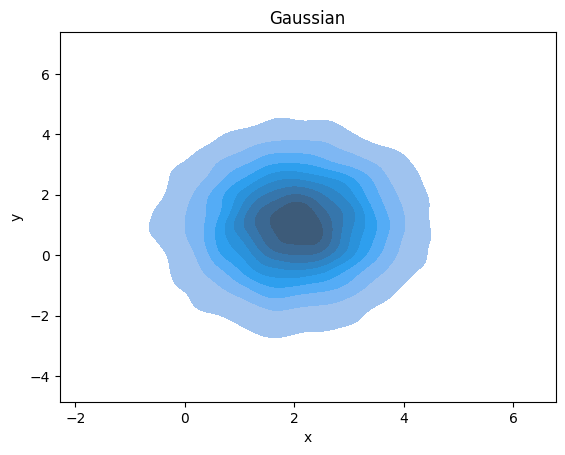

In [12]:
mu = np.array([2,1]).reshape(2,1)
covar = np.array([[1,0], [0, 2]])
N = 10000
def generate(N, covar):
  samples = []
  L = np.linalg.cholesky(covar)
  for i in range(N):
    samples.append(mu + np.matmul(L, np.random.standard_normal(size=(2,1))))
  return samples

nparr = np.array(generate(N, covar)).squeeze()
df_gaussian = pd.DataFrame(data = nparr, columns = ["x", "y"])
sns.kdeplot (data=df_gaussian, x="x", y="y", fill=True).set_title('Gaussian')


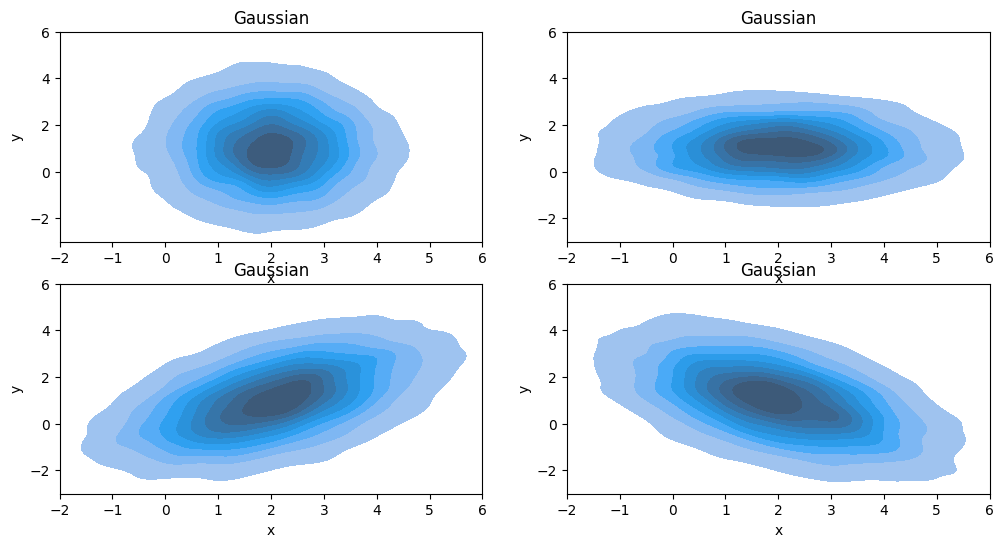

In [13]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 6))
df_gaussian = pd.DataFrame(data = np.array(generate(N, np.array([[1,0], [0, 2]]))).squeeze(), columns = ["x", "y"])
sns.kdeplot (data=df_gaussian, x="x", y="y", fill=True, ax=axs[0][0]).set_title('Gaussian')
df_gaussian = pd.DataFrame(data = np.array(generate(N, np.array([[2,0], [0, 1]]))).squeeze(), columns = ["x", "y"])
sns.kdeplot (data=df_gaussian, x="x", y="y", fill=True, ax=axs[0][1]).set_title('Gaussian')
df_gaussian = pd.DataFrame(data = np.array(generate(N, np.array([[2,1], [1, 2]]))).squeeze(), columns = ["x", "y"])
sns.kdeplot (data=df_gaussian, x="x", y="y", fill=True, ax=axs[1][0]).set_title('Gaussian')
df_gaussian = pd.DataFrame(data = np.array(generate(N, np.array([[2,-1], [-1, 2]]))).squeeze(), columns = ["x", "y"])
sns.kdeplot (data=df_gaussian, x="x", y="y", fill=True, ax=axs[1][1]).set_title('Gaussian')
for ax in axs:
  for a in ax:
    a.set_xlim(-2, 6)
    a.set_ylim(-3, 6)

# Rejection Sampling

Before applying rejection sampling, it is critical to check that  
$\frac{f(x)}{M} < g(x) \forall x$. This is checked here by plotting  
 $\frac{f(x)}{M.g(x)} $ is below 1![rejsampler-1.png]().

In [14]:
def RejectionSampler(f_pdf, g_pdf, g_sample, M, N):
    # Returns N samples following pdf f_pdf() using proposal g(x)
    # with pdf g_pdf() that can be sampled by g_sample()
    # Requirement: f_pdf(x)/M <= g_pdf(x) for all x
    i = 0
    x = np.zeros(N)
    while i < N:
        x_prop = g_sample()
        u = npr.uniform(0, 1)
        if (u * M * g_pdf(x_prop)) < f_pdf(x_prop):
            # Accept the sample and record it
            x[i] = x_prop
            i += 1
    return x

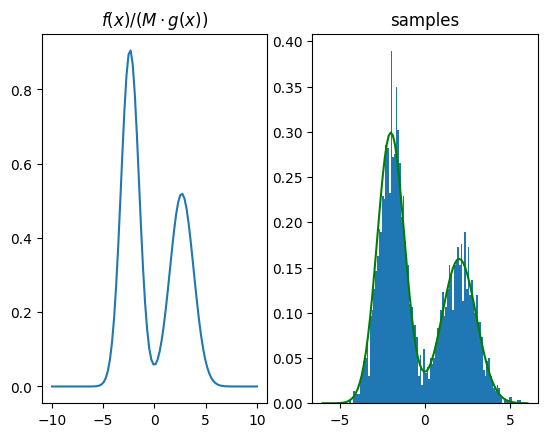

In [15]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt

# Set the random seed
npr.seed(42)

# Define normal pdf
def normpdf(x, mu, sigma):
    return 1/np.sqrt(2*np.pi*sigma**2) * np.exp(-(x-mu)**2 / (2*sigma**2))

# Define target pdf as a mixture of two normals
def target_pdf(x):
    return 0.6*normpdf(x, -2, 0.8) + 0.4*normpdf(x, 2, 1)

# Define the proposal pdf and a function to sample from it
def proposal_pdf(x):
    return normpdf(x, 0, 2)

def sample_proposal():
    return 2*npr.randn()

# Define M
M = 3
N = 3000
mysample = RejectionSampler(target_pdf, proposal_pdf, sample_proposal, M, N)
fig, ax = plt.subplots(1, 2)
t = np.linspace(-6, 6, 100)
t2 = np.linspace(-10, 10, 100)

# Plot f(x) / (M * g(x)) to verify M is valid (the line should be below 1)
ax[0].plot(t2, target_pdf(t2) / (M*proposal_pdf(t2)))
ax[0].set_title('$f(x) / (M \cdot g(x))$')
ax[1].hist(mysample, 100, density=True)
ax[1].plot(t, target_pdf(t), 'g')
ax[1].set_title('samples')
plt.show()

# p-values and null hypothesis significance testing

The two sample t-test for unpaired data can be used to test if two samples $X_1$ and $X_2$ with means $\mu _1 $ and  $\mu _2 $ have the same mean ( $\mu _1 = \mu _2$ ). The test assumes both samples are normally distributed. The null hypothesis  $H_0$ is that   $\mu _1 = \mu _2$. The test statistic is 

# $t = \frac{\bar{X_1} - \bar{X_2}}{\sqrt{\frac{s_1^2}{N_1} + \frac{s_2^2}{N_2}}}$
- $\bar{X_1}$ and $\bar{X_2}$ are sample means
- $s_1^2$ and $s_1^2$ are sample variances
- $N_1$ and $N_2$ are sample size

Under $H_0$, the test statistic approximately follows the Student’s t-distribution, which is usually used to evaluate the p-value: probability that under $H_0$ we would obtain at least as extreme test statistic as was observed.

The general NHST procedure proceeds as follows:

- Set up a null hypothesis H0 and alternative hypothesis H1, select a test statistic t to differentiate the hypotheses.
- Evaluate the test-statistic under the observed data t(X).
- Evaluate the p-value:
    $p=Pr(t \: is \: at \: least \: as \: extreme \: as \: t(X) \: | \: H0)$,
    i.e. probability, that under the null hypothesis, the test statistic would be at least as extreme as was observed.
- Reject H0 if the p-value is smaller than pre-selected significance level (often 0.05).


## Resampling : permutation test

The main challenge for developing NHST methods is to determine the distribution of the test statistic under $H_0$. This is needed for determining the  $p$-value. Already in the simple example above where everything is assumed to follow the normal distribution, it was not possible to evaluate this distribution exactly.

Computational methods such as permutation testing can help, but at the price of heavier computation and often also decreased statistical power. Permutation testing should thus only be used if no analytical solution is available.


Permutation testing provides a direct computational tool for evaluating the distribution of the test statistic under $H_0$ by simulation.

As an example, let us consider a test to determine if two samples $X_1$ and $X_2$ come from the same distribution. The null distribution $H_0$ would in this case be that they come from the same distribution, while $H_1$ would assume some specific difference between the distributions (different mean, different variance). To simulate a sample from $H_0$, one can randomly reshuffle elements of $X_1$ and $X_2$.


By repeating the random reshuffling $M$ times, we obtain $M$ permutation test statistics $t_1 , … , t_M$ that follow the distribution $p( t | H_0)$.

Assuming $B$ of these yield results that are at least as extreme as  $t(X)$, we can obtain the permutation $p$-value as
$p = P(t_i \, is \,  at \, least \, as \, extreme \, as \,  t(X) | H_0) = \frac{B + 1}{M + 1}$.


The addition of +1 to both B and M is important to avoid underestimation of small  $p$-values (Phipson and Smyth (2010)). Without it, we might obtain  p = 0 with very small M, which would lead to incorrect conclusions. In this form the minimum  $p$-value is  $\frac{1}{M+1}$, which shows that in order to obtain very small  $p$-values needed for some applications (e.g. genetics and genomics), a very large number of permutations will be required.

In [16]:
# Example: testing by using the absolute difference of the means as the test statistic
import numpy as np
import numpy.random as npr
npr.seed(42)

def shuffle(x1, x2):
    """Return a random reshuffling of elements in two arrays"""
    n1 = len(x1)
    z = npr.permutation(np.concatenate((x1, x2)))
    return z[0:n1], z[n1:]

# Set the number of permutations
N_perm = 5000

# Generate two samples
x1 = npr.normal(size=200)
x2 = npr.normal(size=200) + 0.5

# Examine the examples
print("mean(x1):", np.mean(x1))
print("mean(x2):", np.mean(x2))

truediff = np.abs(np.mean(x1) - np.mean(x2))
print("true difference: ", truediff)

# Repeatedly randomly permute to mix the groups
meandiffs = np.zeros(N_perm)
for i in range(N_perm):
    z1, z2 = shuffle(x1, x2)
    meandiffs[i] = np.abs(np.mean(z1) - np.mean(z2))

# number of times the sample diffs are higher than observed when truely it comes from same sample
print('p-value:', (np.sum(truediff <= meandiffs)+1)/(len(meandiffs)+1))

mean(x1): -0.04077096517208498
mean(x2): 0.5858681868988764
true difference:  0.6266391520709614
p-value: 0.0001999600079984003


## Permutation testing for structured populations
Let us assume we wish to apply a permutation test to evaluate if the difference in test scores between two schools is statistically significant. The simple test above assumes that the only important difference between the populations of pupils in the two schools is the identity of the school they attended.

This assumption is not always realistic, for we might for example know that the distribution of parent education levels might be different between the schools and this might influence the observed test scores. If we know of such confounding factors, we can correct for them by making sure the permutations do not change the distribution of the confounders. This can be achieved for instance by stratifying the permutations to only mix within known subgroups, i.e. separately permuting pupils with highly educated and less educated parents.

The example below demonstrates this for an example of two fictional schools with different background demographics. The difference is caused only by the demography, but standard permutation test fails to detect this and identifies a statistically significant difference between the schools.

non-stratified p-value: 0.04595404595404595
stratified p-value: 0.4225774225774226


(array([3.69893639, 2.95914911, 2.58925547, 3.28794346, 3.49343993,
        2.87695053, 2.4659576 , 2.4248583 , 2.54815618, 2.09606396,
        1.43847526, 1.76726961, 1.72617032, 1.27407809, 1.06858162,
        1.15078021, 0.73978728, 0.6164894 , 0.41099293, 0.57539011,
        0.69868799, 0.28769505, 0.12329788, 0.20549647, 0.12329788,
        0.20549647, 0.04109929, 0.08219859, 0.        , 0.12329788]),
 array([8.39231851e-05, 2.44152418e-02, 4.87465605e-02, 7.30778791e-02,
        9.74091977e-02, 1.21740516e-01, 1.46071835e-01, 1.70403154e-01,
        1.94734472e-01, 2.19065791e-01, 2.43397110e-01, 2.67728428e-01,
        2.92059747e-01, 3.16391066e-01, 3.40722384e-01, 3.65053703e-01,
        3.89385021e-01, 4.13716340e-01, 4.38047659e-01, 4.62378977e-01,
        4.86710296e-01, 5.11041615e-01, 5.35372933e-01, 5.59704252e-01,
        5.84035571e-01, 6.08366889e-01, 6.32698208e-01, 6.57029526e-01,
        6.81360845e-01, 7.05692164e-01, 7.30023482e-01]),
 <BarContainer object of 30 

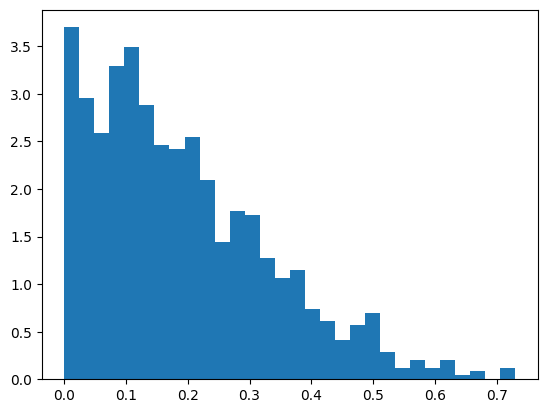

In [19]:
N_perm = 1000

n1_high = 30
n1_low = 10
n2_high = 10
n2_low = 30

def merge(x1, x2):
    """Merge two data sets"""
    return np.concatenate((x1, x2))

# True model: pupils with high-education background have higher scores,
# no effect on school
school1_high = npr.randn(n1_high) + 1.4
school2_high = npr.randn(n2_high) + 1.4
school1_low = npr.randn(n1_low)
school2_low = npr.randn(n2_low)

school1 = merge(school1_high, school1_low)
school2 = merge(school2_high, school2_low)

#print(np.mean(school1), np.mean(school2))

# Standard non-stratified permutation
truediff = np.abs(np.mean(school1) - np.mean(school2))
# Repeatedly randomly permute to mix the groups
meandiffs = np.zeros(N_perm)
for i in range(N_perm):
    # Shuffle pupils from the two schools
    z1, z2 = shuffle(school1, school2)
    # Compute the difference between shuffled groups
    meandiffs[i] = np.abs(np.mean(z1) - np.mean(z2))

print('non-stratified p-value:', (np.sum(truediff <= meandiffs)+1)/(len(meandiffs)+1))

meandiffs2 = np.zeros(N_perm)
# Stratified permutation
for i in range(N_perm):
    # Shuffle two groups independently
    z1_low, z2_low = shuffle(school1_low, school2_low)
    z1_high, z2_high = shuffle(school1_high, school2_high)
    # Re-merge the two groups for each school
    z1 = merge(z1_low, z1_high)
    z2 = merge(z2_low, z2_high)
    # Compute the difference as usual
    meandiffs2[i] = np.abs(np.mean(z1) - np.mean(z2))

print('stratified p-value:', (np.sum(truediff <= meandiffs2)+1)/(len(meandiffs2)+1))
plt.hist(meandiffs, 30, density=True)


0.4909327514255162


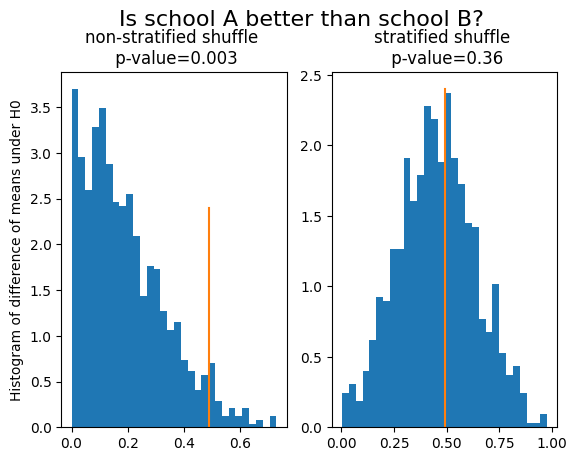

In [20]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2)

print(truediff)
ax[0].hist(meandiffs, 30, density=True)
ax[0].plot((truediff, truediff), (0, 2.4))
ax[0].set_ylabel("Histogram of difference of means under H0")
ax[0].set_title('non-stratified shuffle \n p-value=0.003')
ax[1].hist(meandiffs2, 30, density=True)
ax[1].plot((truediff, truediff), (0, 2.4))
ax[1].set_title('stratified shuffle \n p-value=0.36')
fig.suptitle('Is school A better than school B?\n\n\n', fontsize=16)
plt.subplots_adjust(top=0.85)
plt.show()

## Pros, cons and caveats of null-hypothesis significance testing

NHST can be a useful too for evaluating statistical significance, but it has a number of limitations:

- p-values need to be interpreted with great care. Unlike commonly thought,  p-value does not measure the probability that  H0 is true.
- p-values are only strictly valid for pre-specified tests. Any adaptivity in the analysis will destroy any theoretical guarantees.
- Error control on the false positive probability of individual tests means that under multiple testing, the number of false positive errors can be very high. (5% probability of false positive in each test means on average 5 false positives from 100 tests. Multiple testing correction can help by setting more strict cutoffs here.)
- Need to be careful about what is being tested: does “at least as extreme” consider one tail or two tails?

## Bootstrap sampling
One of the fundamental questions of statistics is to translate results from an individual observed sample to the larger population. This involves the question of what could have happened, had the sample been drawn differently from the same larger population. More formally, especially frequentist statistics is interested in the performance of methods under repeated sampling from the data generating mechanism  $p(x)$.

Usually the true data generating mechanism  p(x) is not known or accessible. Bootstrap sampling provides an accessible approach for computationally approximating computations requiring access to the data generating mechanism.

The Bootstrap principle suggests to approximate p(x) by sampling from the empirical data distribution $p_e(x)$ with replacement. By sampling a data set of a given size, usually the same size as the original data set, we can estimate the uncertainty related to the sampling of the original data set.

The most common use of bootstrap sampling is the evaluation of confidence intervals for various statistical procedures, such as the estimation of some parameter θ.

Assuming the original data set $X = (x_1,…,x_N)$ has $N$ samples, bootstrap sampling works by generating $M$ pseudo-data-sets $X^∗_i, i = 1 , … , M$ , by always sampling $N$ elements of $X$ with replacement. Sampling with replacement implies that each pseudo-data-set is very likely to contain duplicates of some samples while missing others.

For each pseudo-data-set $X^∗_i$, ones obtains an estimate $θ^∗_i$ of the parameter θ. Confidence intervals, such as the two-sided 1−α confidence interval can be obtained as  $[h_{α/2},h_{1−α/2}]$, where $h_α$ denotes the α quantile of the bootstrap estimates $θ^∗_i$.

In [21]:
# Example: confidence interval on the mean of a set of values
import numpy as np
import numpy.random as npr

npr.seed(42)
N = 100
x = npr.normal(size=N)

print(np.mean(x))
alpha = 0.05
means = np.zeros(1000)
for i in range(1000):
    I = npr.randint(N, size=N)
    means[i] = np.mean(x[I])
print(np.percentile(means, [100*alpha/2, 100*(1-alpha/2)]))


-0.10384651739409384
[-0.27233642  0.06285149]


In [22]:
import scipy.integrate as integrate
